### Student Information
Name: HA ANH XUONG

Student ID: D610114001 (Taipei Medical University)

GitHub ID: 234748555

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [174]:
### Begin Assignment Here

In [175]:
# Import necessary libraries and test code for environment setup
import pandas as pd
import re, numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import plotly as py
import math
import matplotlib.pyplot as plt
import PAMI
import umap
import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hax16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [176]:
import sys
print(sys.executable) # d:\Lab1\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
print(sys.version) #3.11.0

D:\Lab1\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [177]:
# Data loading
raw_df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
raw_df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


## 1. Overview of the raw data

In [178]:
# Data shape, missing values, duplicate rows
print("Shape (rows, columns):", raw_df.shape)

cols = raw_df.columns.tolist()
print("\nColumn titles:", cols)

print("\nMissing values per column:")
print(raw_df.isnull().sum())

print("\nNumber of duplicate rows:", raw_df.duplicated().sum())

Shape (rows, columns): (847, 16)

Column titles: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

Missing values per column:
type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

Number of duplicate rows: 0


In [179]:
raw_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [180]:
raw_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

## 2. New data frame to use

In [181]:
# Create a new dataframe to use
new_df = raw_df[['type', 'datetime', 'subreddit', 'title', 'text', 'sentiment']].copy() # Select columns
new_df[:10]

,type,datetime,subreddit,title,text,sentiment
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,"Hoping to ejaculate in wet warm puss tonight, ...",1.0
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,Trump will respond to china increasing their t...,-1.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,Confirmed not a trap. Its been like this for p...,1.0
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Am I the only one seeing the cup & handle brea...,1.0
9,comment,2021-12-31 16:29:49,stockstobuytoday,Any cheap stocks under $10?,HLGN is $10. Hurry and catch it now before it ...,0.0


In [182]:
# Data shape, missing values, duplicate rows of new data frame
print("Shape (rows, columns):", new_df.shape)

cols_new = new_df.columns.tolist()
print("\nColumn titles:", cols_new)

print("\nMissing values per column:")
print(new_df.isnull().sum())

print("\nNumber of duplicate rows:", new_df.duplicated().sum())

Shape (rows, columns): (847, 6)

Column titles: ['type', 'datetime', 'subreddit', 'title', 'text', 'sentiment']

Missing values per column:
type         0
datetime     0
subreddit    0
title        0
text         0
sentiment    0
dtype: int64

Number of duplicate rows: 0


In [183]:
# Convert complex datetime to year only
new_df['datetime'] = pd.to_datetime(new_df['datetime'], errors='coerce')
new_df['datetime'] = new_df['datetime'].dt.year 

In [184]:
# Count values in each column: type, datetime, subreddit, and sentiment
type_counts = new_df['type'].value_counts()
datetime_counts = new_df['datetime'].value_counts().sort_index()  # sort by year
subreddit_counts = new_df['subreddit'].value_counts()
sentiment_counts = new_df['sentiment'].value_counts()
print('Count values of type:\n', type_counts)
print('\nCount values of datetime:\n', datetime_counts)
print('\nCount values of subreddit:\n', subreddit_counts)
print('\nCount values of sentiment:\n', type_counts)

Count values of type:
 type
comment    783
post        64
Name: count, dtype: int64

Count values of datetime:
 datetime
2021     99
2022     22
2023     14
2024     22
2025    690
Name: count, dtype: int64

Count values of subreddit:
 subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64

Count values of sentiment:
 type
comment    783
post        64
Name: count, dtype: int64


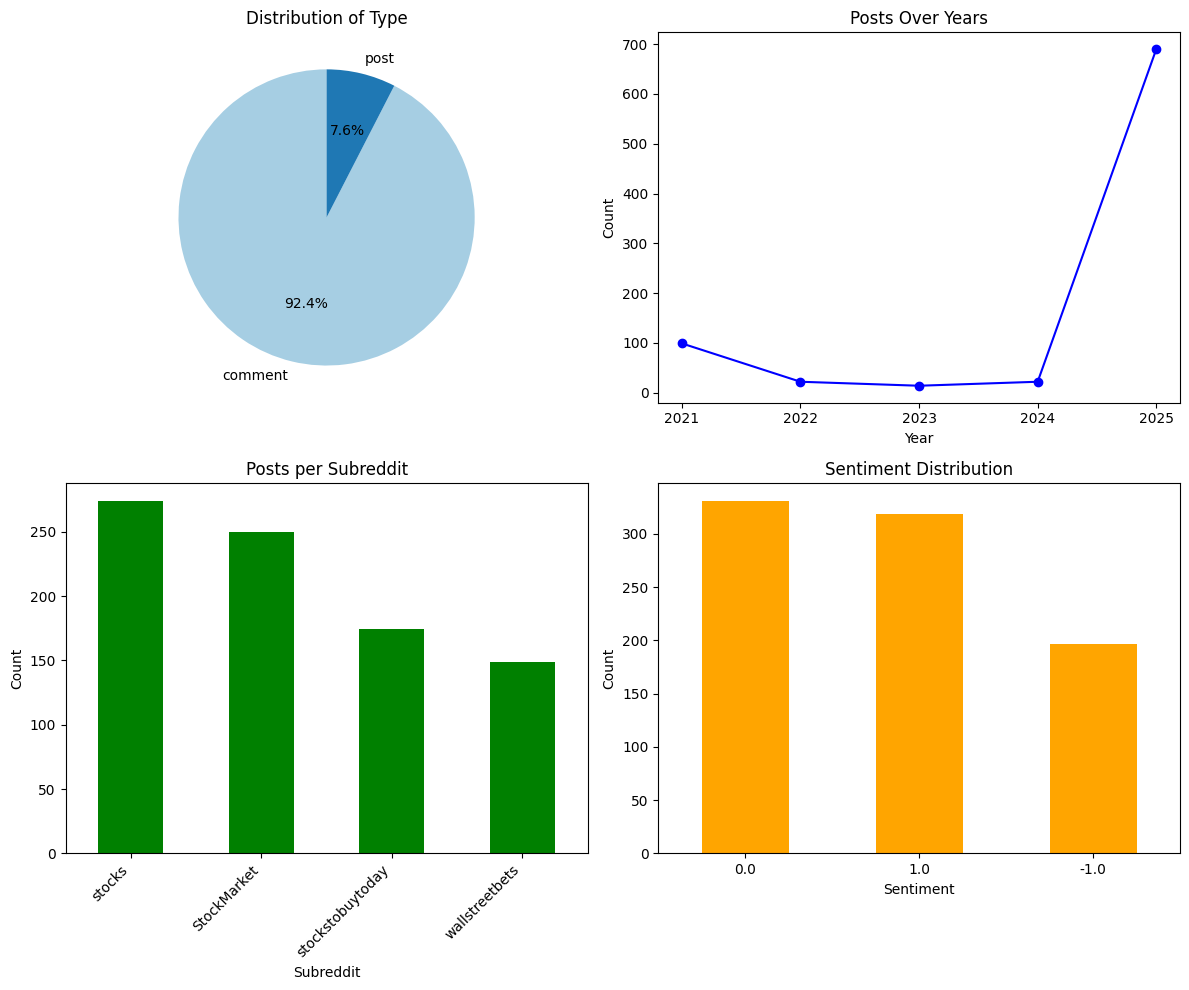

In [185]:
# Visualization of the above cout values
plt.figure(figsize=(12, 10))

#Type
plt.subplot(2, 2, 1)
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Type')
plt.ylabel('')

#Datetime
from matplotlib.ticker import MaxNLocator
plt.subplot(2, 2, 2)
datetime_counts.plot(kind='line', marker='o', color='blue')
plt.title('Posts Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

#Subreddit
plt.subplot(2, 2, 3)
subreddit_counts.plot(kind='bar', color='green')
plt.title('Posts per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

#Sentiments
plt.subplot(2, 2, 4)
sentiment_counts.plot(kind='bar', color='orange')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

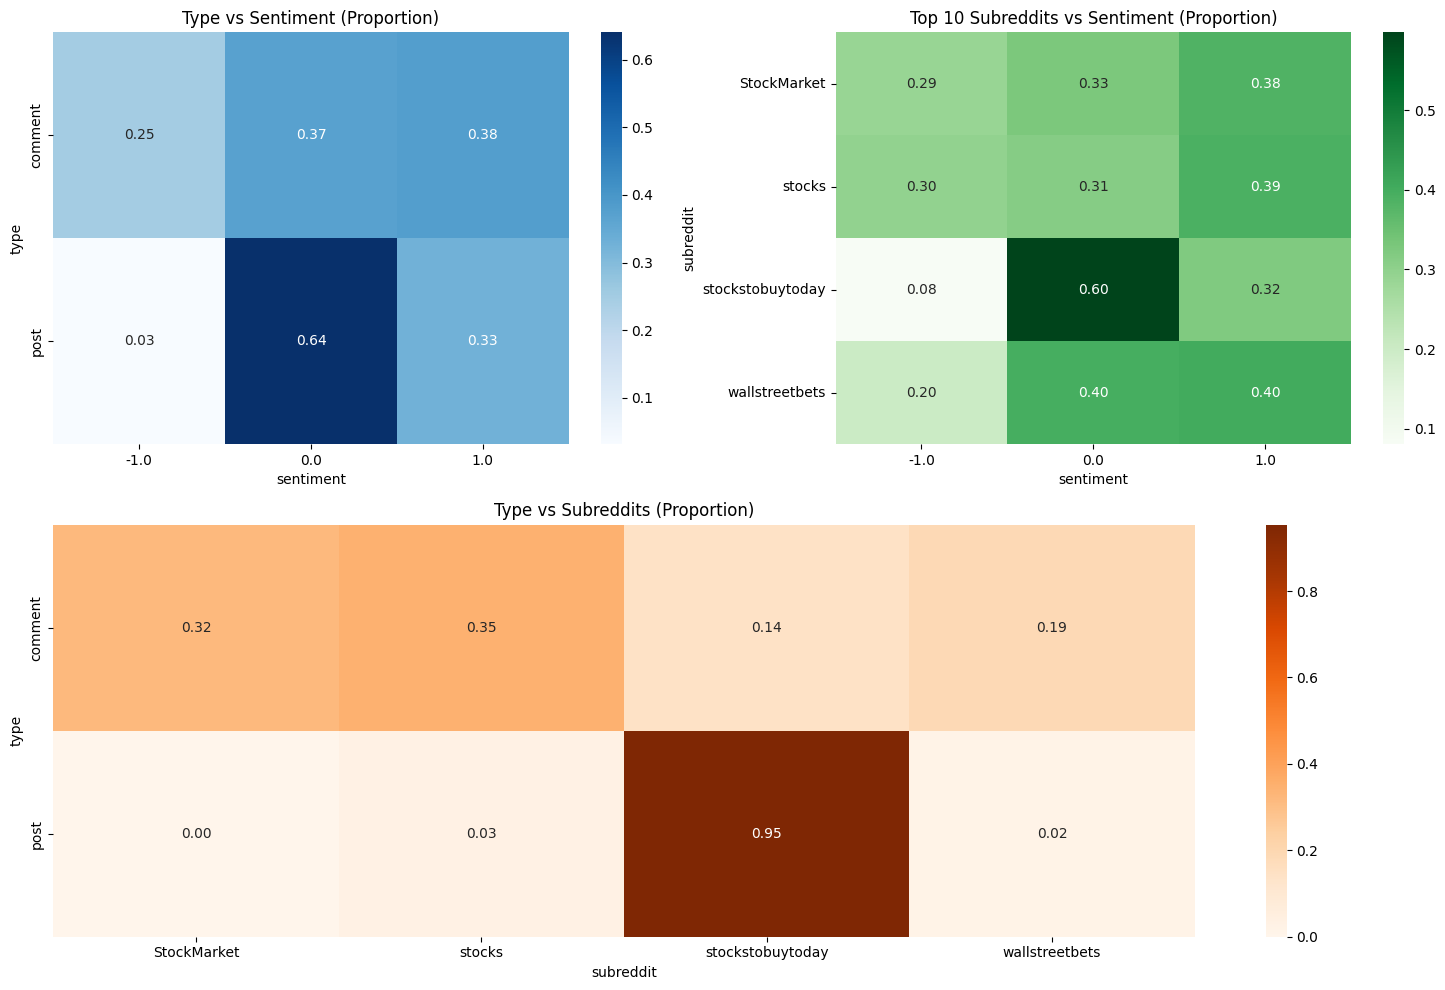

In [186]:
## The correlations among type, sentiment, and subreddit

# Crosstab between Type and Sentiment
ct_type_sentiment = pd.crosstab(new_df['type'], new_df['sentiment'], normalize='index')

# Crosstab between Subreddit and Sentiment (normalize within subreddit)
ct_subreddit_sentiment = pd.crosstab(new_df['subreddit'], new_df['sentiment'], normalize='index')

# Crosstab between Type and Subreddit (normalize within type)
ct_type_subreddit = pd.crosstab(new_df['type'], new_df['subreddit'], normalize='index')

import seaborn as sns
plt.figure(figsize=(15,10))

# Type vs Sentiment
plt.subplot(2,2,1)
sns.heatmap(ct_type_sentiment, annot=True, cmap="Blues", fmt=".2f")
plt.title("Type vs Sentiment (Proportion)")

# Subreddit vs Sentiment 
plt.subplot(2,2,2)
sns.heatmap(ct_subreddit_sentiment, annot=True, cmap="Greens", fmt=".2f")
plt.title("Top 10 Subreddits vs Sentiment (Proportion)")

# Type vs Subreddit
plt.subplot(2,1,2)
sns.heatmap(ct_type_subreddit, annot=True, cmap="Oranges",fmt=".2f")
plt.title("Type vs Subreddits (Proportion)")

plt.tight_layout()
plt.show()

   datetime         subreddit  count
0      2021            stocks     41
1      2021  stockstobuytoday     58
2      2022  stockstobuytoday     22
3      2023  stockstobuytoday     14
4      2024  stockstobuytoday     22
5      2025       StockMarket    250
6      2025            stocks    233
7      2025  stockstobuytoday     58
8      2025    wallstreetbets    149


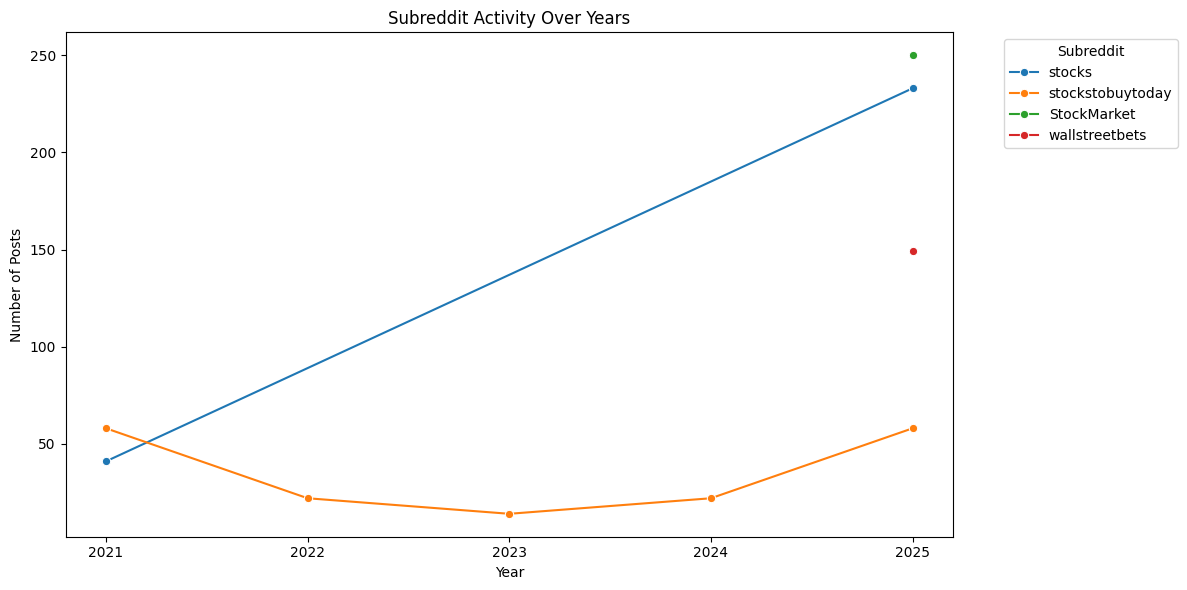

In [187]:
# Count posts per subreddit per year
subreddit_year = new_df.groupby(['datetime', 'subreddit']).size().reset_index(name='count')
print(subreddit_year)
plt.figure(figsize=(12, 6))
sns.lineplot(data=subreddit_year, x='datetime', y='count', hue='subreddit', marker='o')

plt.title("Subreddit Activity Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

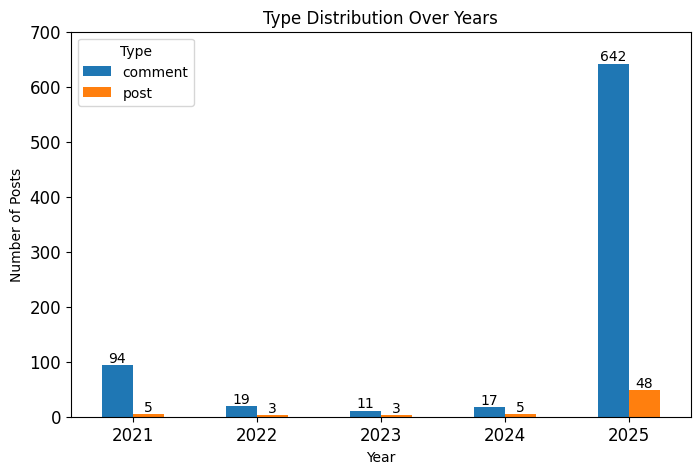

In [188]:
#Type Distribution over years

type_year_pivot = type_year.pivot(index='datetime', columns='type', values='count').fillna(0)

# Plot grouped bar chart
ax=type_year_pivot.plot(kind='bar', 
                     title='Type Distribution Over Years',
                     ylim=[0, 700],
                     rot=0,
                     fontsize=12,
                     figsize=(8,5))

plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.legend(title='Type')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, rotation=0)
plt.show()

## 3. Text feature creation

In [189]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hax16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hax16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [190]:
new_df['title_unigram'] = new_df['title'].apply(lambda x: dmh.tokenize_text(x))
new_df['text_unigram'] = new_df['text'].apply(lambda x: dmh.tokenize_text(x))

In [191]:
new_df[0:5]

,type,datetime,subreddit,title,text,sentiment,title_unigram,text_unigram
0,comment,2025,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,"[Retardation, is, on, the, menu, boys, !, WSB,...","[Calls, on, retards]"
1,comment,2025,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0,"[Retail, giant, TARGET, has, now, declined, fo...","[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,2025,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,"[How, do, you, feel, about, a, sitting, presid...","[Seeing, lots, of, red, in, the, ticker, .]"
3,post,2023,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Who, knows, more, ?, $, VMAR]","[Vision, Marine, Technologies, Inc., is, rewri..."
4,comment,2025,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0,"[The, Trump, administration, is, begging, Xi, ...","[He, didn, ’, t, say, thank, you, .]"


In [192]:
count_vect = CountVectorizer()
new_df_counts_text = count_vect.fit_transform(new_df.text)
print(new_df_counts_text[0])
print(new_df_counts_text.shape)

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1
(847, 4346)


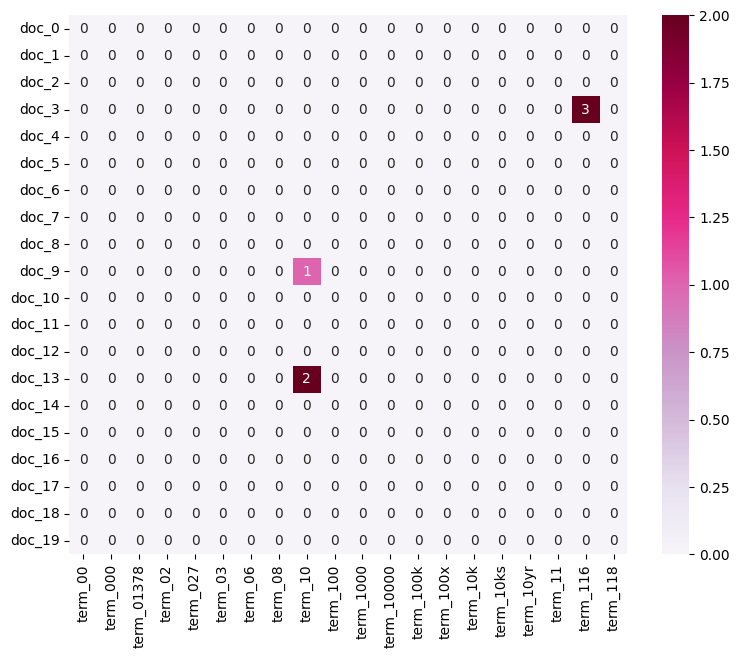

In [193]:
# Draw the first 20 terms in the first 20 docs of text
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(new_df.index)[0:20]]
plot_z = new_df_counts_text[0:20, 0:20].toarray()
new_df_text_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(new_df_text_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

  (np.int32(0), np.int32(423))	1
  (np.int32(0), np.int32(277))	2
  (np.int32(0), np.int32(361))	1
  (np.int32(0), np.int32(504))	1
  (np.int32(0), np.int32(321))	1
  (np.int32(0), np.int32(91))	1
  (np.int32(0), np.int32(589))	1
  (np.int32(0), np.int32(461))	1
  (np.int32(0), np.int32(74))	1
(847, 601)


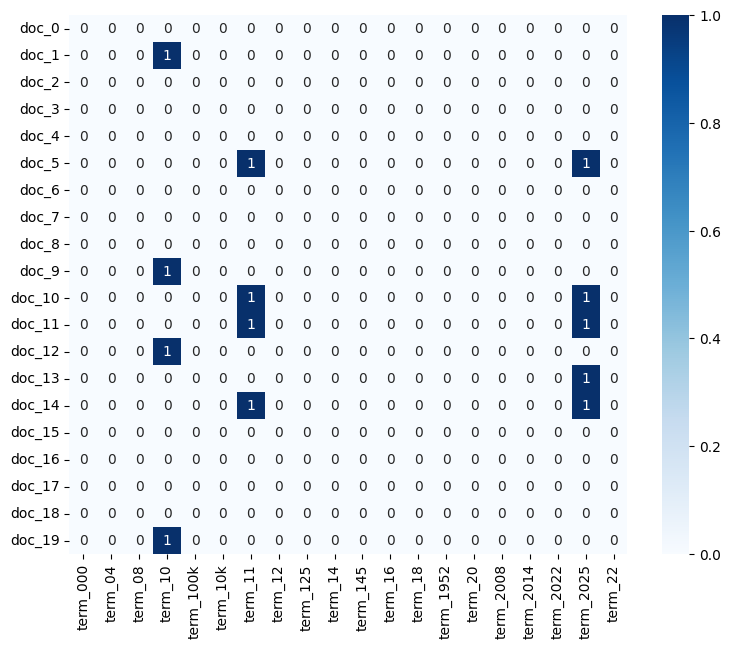

In [194]:
# Draw heatmap from the first 20 terms in the first 20 docs of title
new_df_counts_title = count_vect.fit_transform(new_df.title)
print(new_df_counts_title[0])
print(new_df_counts_title.shape)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(new_df.index)[0:20]]
plot_z = new_df_counts_title[0:20, 0:20].toarray()
new_df_title_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(new_df_title_todraw,
                 cmap="Blues",
                 vmin=0, vmax=1, annot=True)

In [195]:
# Top 30 most frequent words (without stop words in English)
# Vectorizer for text
count_vect_text = CountVectorizer(stop_words="english")
text_counts = count_vect_text.fit_transform(new_df['text'])

# Vectorizer for title
count_vect_title = CountVectorizer(stop_words="english")
title_counts = count_vect_title.fit_transform(new_df['title'])

# Term frequencies
term_freq_text = np.asarray(text_counts.sum(axis=0)).flatten()
term_freq_title = np.asarray(title_counts.sum(axis=0)).flatten()

# Top 30 words
top_index_text = np.argsort(term_freq_text)[::-1][:30]
top_index_title = np.argsort(term_freq_title)[::-1][:30]

top_words_text = count_vect_text.get_feature_names_out()[top_index_text]
top_words_title = count_vect_title.get_feature_names_out()[top_index_title]

# Randomly sample 50 documents
np.random.seed(45)
sample_text = np.random.choice(text_counts.shape[0], 50, replace=False)
sample_title = np.random.choice(title_counts.shape[0], 50, replace=False)

# Extract top 30 word counts for sampled documents
z30_text = text_counts[sample_text[:, None], top_index_text].toarray()
z30_title = title_counts[sample_title[:, None], top_index_title].toarray()

print("z30_text shape:", z30_text.shape)
print("z30_title shape:", z30_title.shape)


z30_text shape: (50, 30)
z30_title shape: (50, 30)


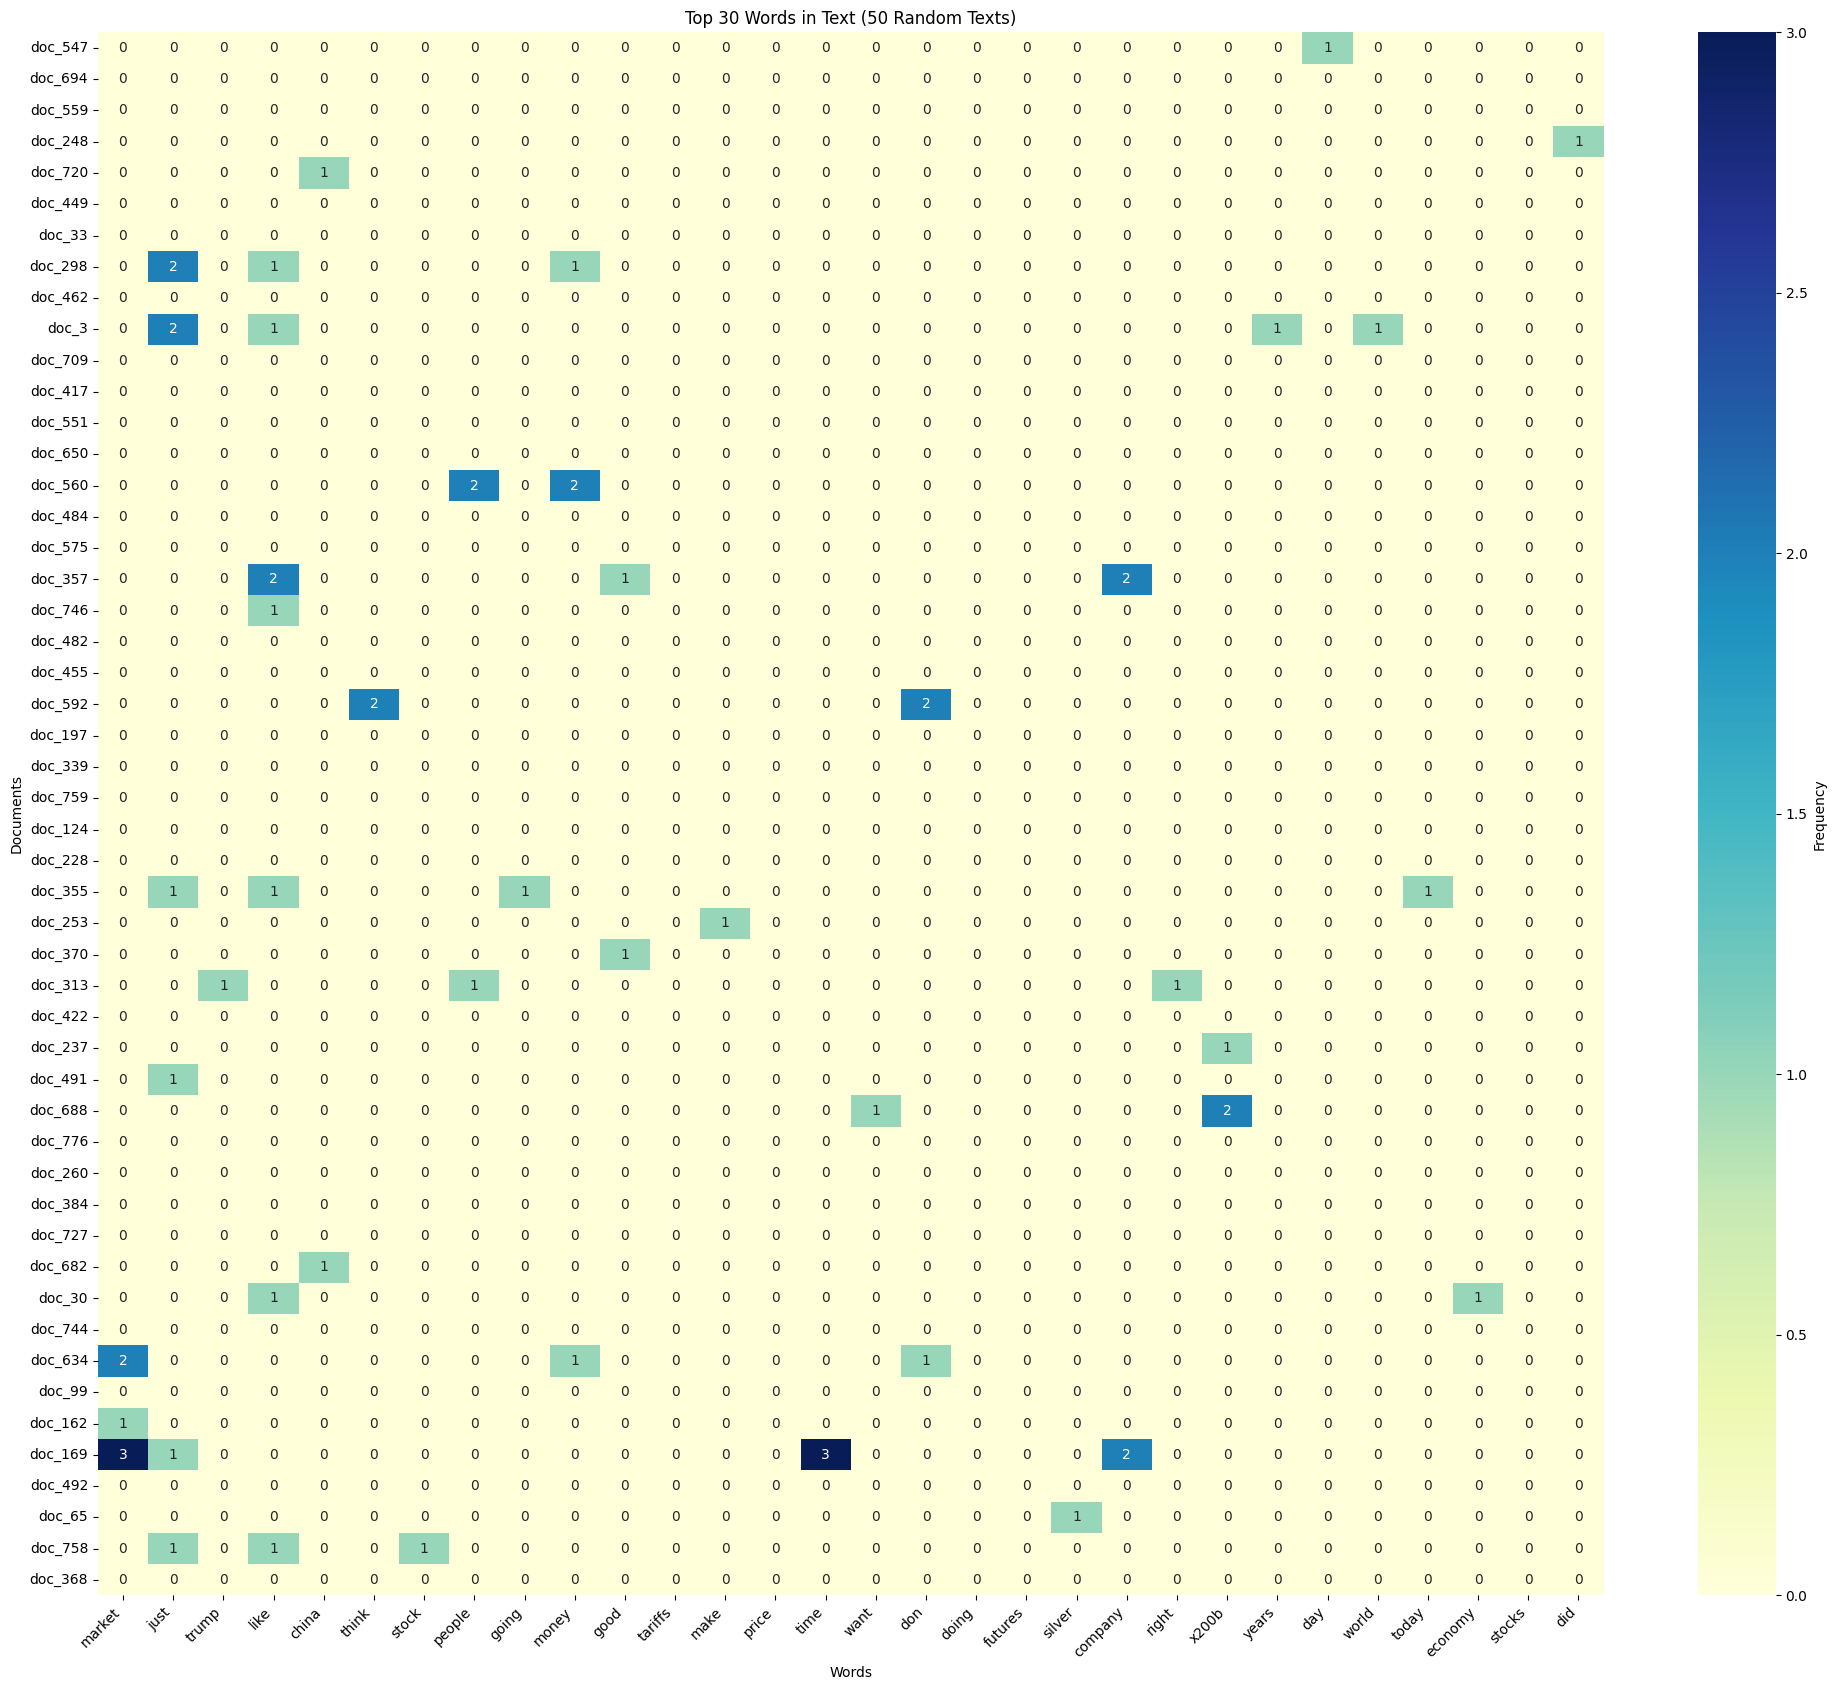

In [196]:
plt.figure(figsize=(20,17))
sns.heatmap(z30_text, 
            cmap="YlGnBu", vmin=0, vmax=3, annot=True,
            xticklabels=top_words_text, 
            yticklabels=[f"doc_{i}" for i in sample_text],
            cbar_kws={'label': 'Frequency'})
plt.title("Top 30 Words in Text (50 Random Texts)")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

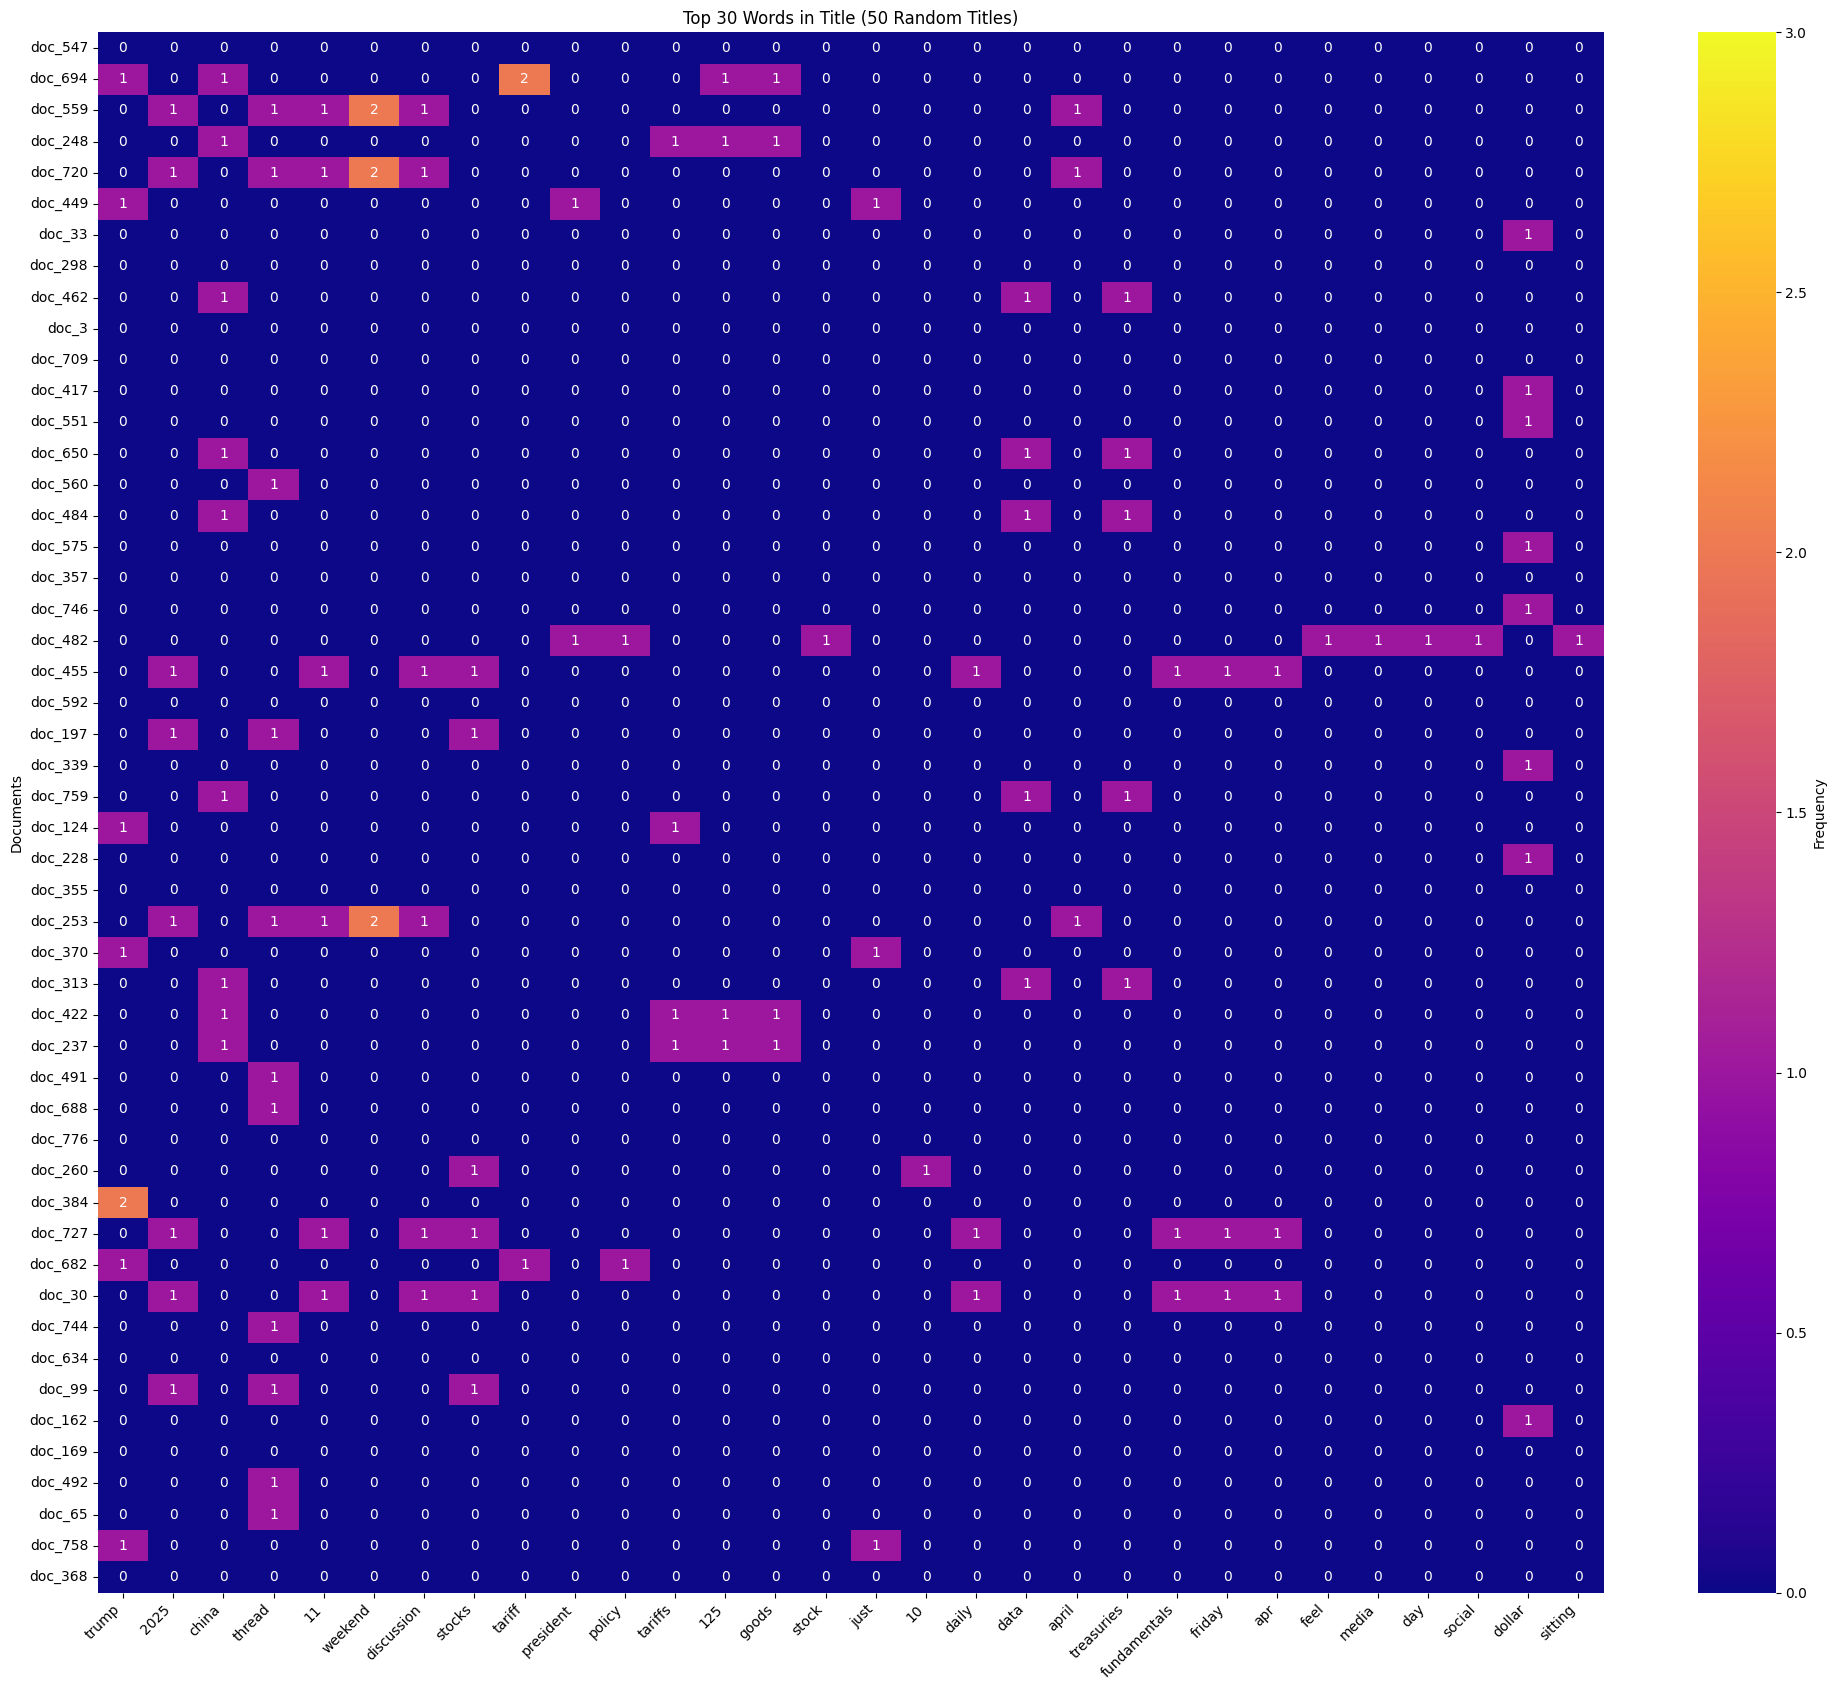

In [197]:
plt.figure(figsize=(20,17))
sns.heatmap(z30_title, 
            cmap="plasma", vmin=0, vmax=3, annot=True,
            xticklabels=top_words_title, 
            yticklabels=[f"doc_{i}" for i in sample_text],
            cbar_kws={'label': 'Frequency'})
plt.title("Top 30 Words in Title (50 Random Titles)")
plt.ylabel("Documents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Number of overlapping words: 7
Overlapping words: ['china', 'day', 'just', 'stock', 'stocks', 'tariffs', 'trump']


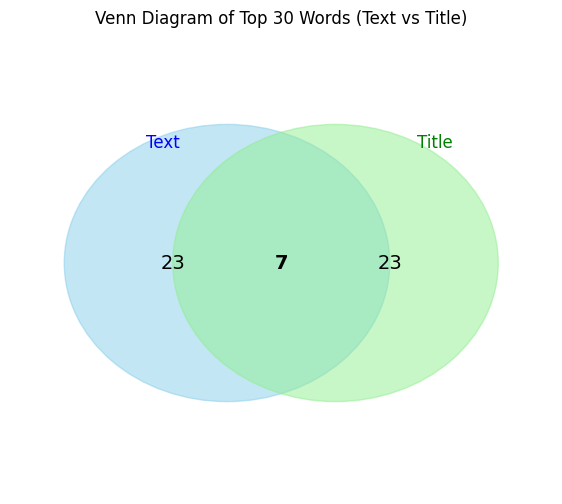

In [198]:
# Venn diagram to show Top 30 words in text and Top 30 words in title in whole new_df

import matplotlib.pyplot as plt

# Convert top words to sets
set_text = set(top_words_text)
set_title = set(top_words_title)

# Calculate intersections and differences
only_text = set_text - set_title
only_title = set_title - set_text
both = set_text & set_title

# Draw circles manually
fig, ax = plt.subplots(figsize=(7, 6))

circle1 = plt.Circle((0.4, 0.5), 0.3, color='skyblue', alpha=0.5)
circle2 = plt.Circle((0.6, 0.5), 0.3, color='lightgreen', alpha=0.5)

ax.add_patch(circle1)
ax.add_patch(circle2)

# Add text counts
plt.text(0.3, 0.5, f"{len(only_text)}", ha='center', va='center', fontsize=14)
plt.text(0.7, 0.5, f"{len(only_title)}", ha='center', va='center', fontsize=14)
plt.text(0.5, 0.5, f"{len(both)}", ha='center', va='center', fontsize=14, fontweight="bold")

# Titles
plt.text(0.25, 0.75, "Text", fontsize=12, color='blue')
plt.text(0.75, 0.75, "Title", fontsize=12, color='green')

plt.axis("off")
plt.title("Venn Diagram of Top 30 Words (Text vs Title)")

print(f"Number of overlapping words: {len(both)}")
print("Overlapping words:", sorted(both))

plt.show()



In [199]:
# Long-tail curve

terms_text = count_vect_text.get_feature_names_out()
terms_title = count_vect_title.get_feature_names_out()

sorted_idx_text = np.argsort(-term_freq_text)  # descending order
sorted_idx_title = np.argsort(-term_freq_title)

terms_sorted_text = terms_text[sorted_idx_text]
terms_sorted_title = terms_title[sorted_idx_title]

freqs_text = term_freq_text[sorted_idx_text]
freqs_title = term_freq_title[sorted_idx_title]

import math
freqs_text_log = [math.log(i) for i in freqs_text]
freqs_title_log = [math.log(i) for i in freqs_title]

x_text = terms_text
y_text = freqs_text
y_text_log = freqs_text_log

x_title = terms_title
y_title = freqs_title
y_title_log = freqs_title_log


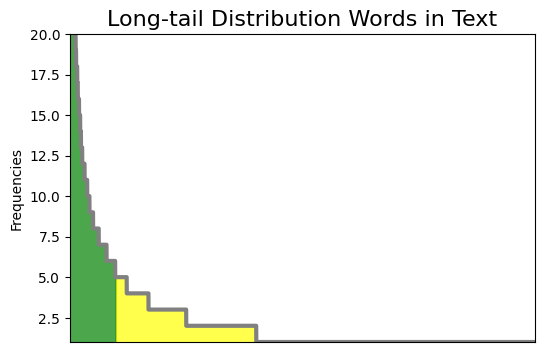

In [200]:
plt.figure(figsize=(6,4))

# Plot the smoothed long-tail curve for text
plt.plot(x_text, y_text, color='gray', linewidth=3)

# Fill the head region (first 10% of terms)
head_cutoff = int(len(x_text)*0.1)
plt.fill_between(x_text[:head_cutoff], y_text[:head_cutoff], color='green', alpha = 0.7)

# Fill the tail region (remaining 90% of terms)
plt.fill_between(x_text[head_cutoff:], y_text[head_cutoff:], color='yellow', alpha = 0.7)

plt.xlim(1, len(freqs_text))
plt.ylim(1, 20)
plt.ylabel('Frequencies')
plt.title("Long-tail Distribution Words in Text", fontsize=16)
plt.xticks([]) 
plt.show()

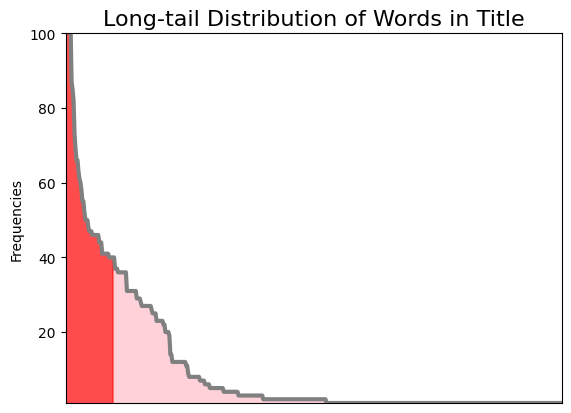

In [201]:
# Plot the smoothed long-tail curve for title
plt.plot(x_title, y_title, color='gray', linewidth=3)

# Fill the head region (first 10% of terms)
head_cutoff = int(len(x_title)*0.1)
plt.fill_between(x_title[:head_cutoff], y_title[:head_cutoff], color='red', alpha = 0.7)

# Fill the tail region (remaining 90% of terms)
plt.fill_between(x_title[head_cutoff:], y_title[head_cutoff:], color='pink', alpha = 0.7)

plt.xlim(1, len(freqs_title))
plt.ylim(1, 100)
plt.ylabel('Frequencies')
plt.title("Long-tail Distribution of Words in Title", fontsize=16)
plt.xticks([]) 
plt.show()

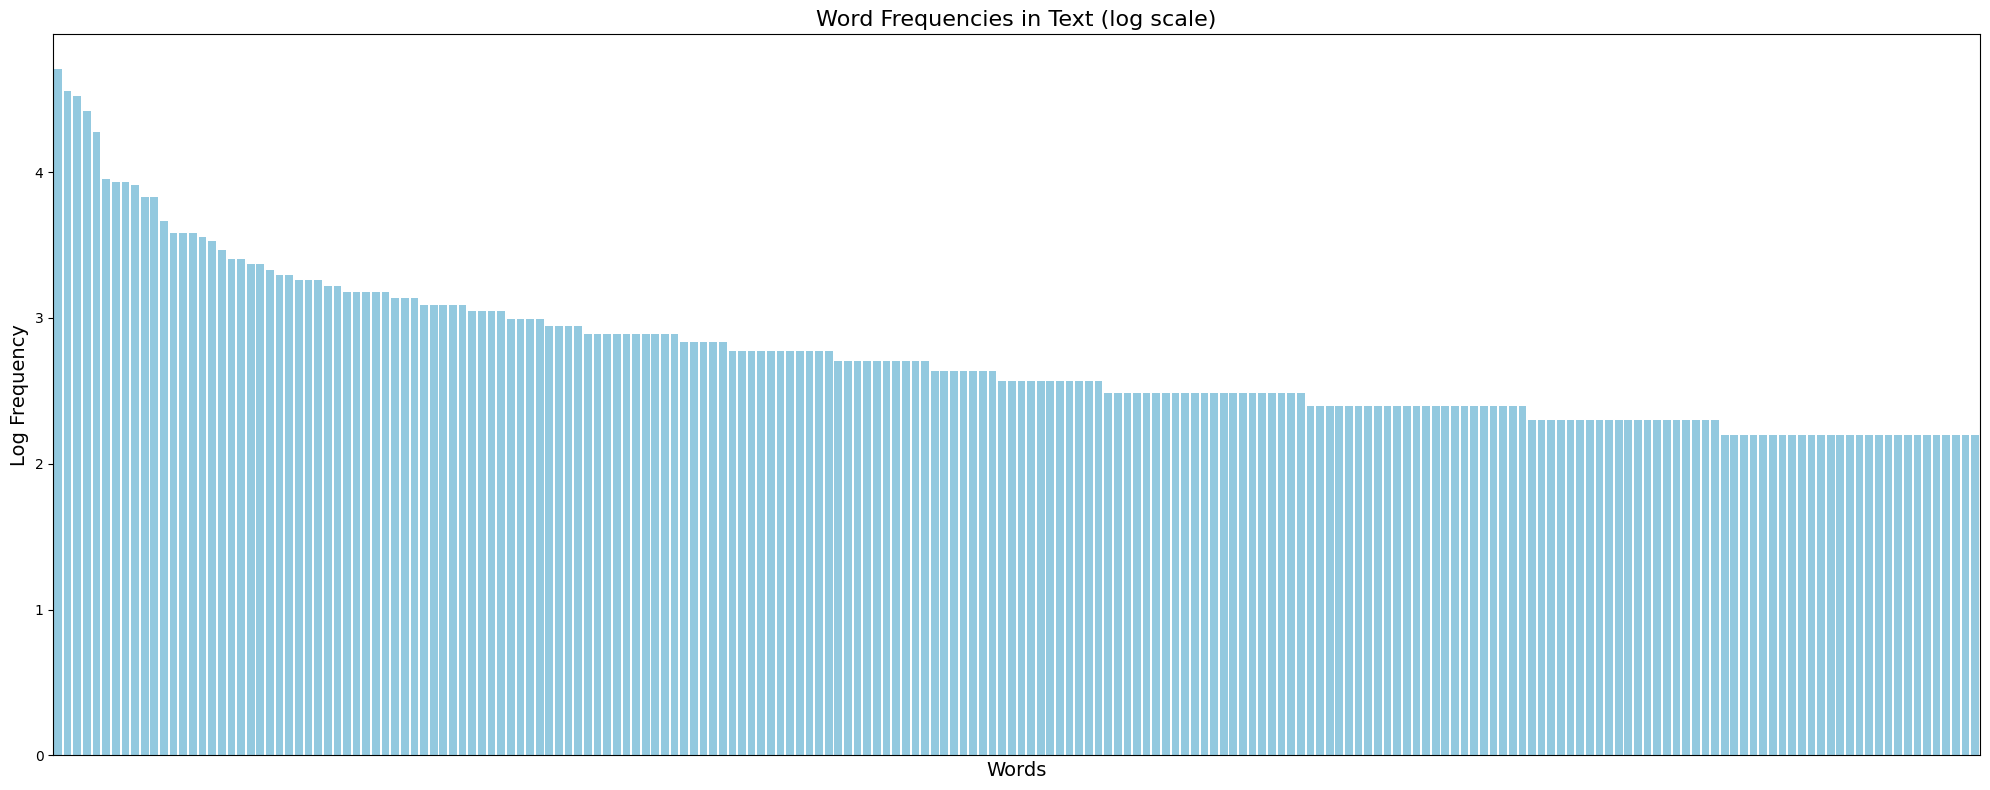

In [202]:
plt.figure(figsize=(20, 8))
g = sns.barplot(x=x_text[:200], y=y_text_log[:200], color="skyblue")
plt.xticks(rotation=90)
plt.title("Word Frequencies in Text (log scale)", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Log Frequency", fontsize=14)
plt.xticks([]) 

plt.tight_layout()
plt.show()

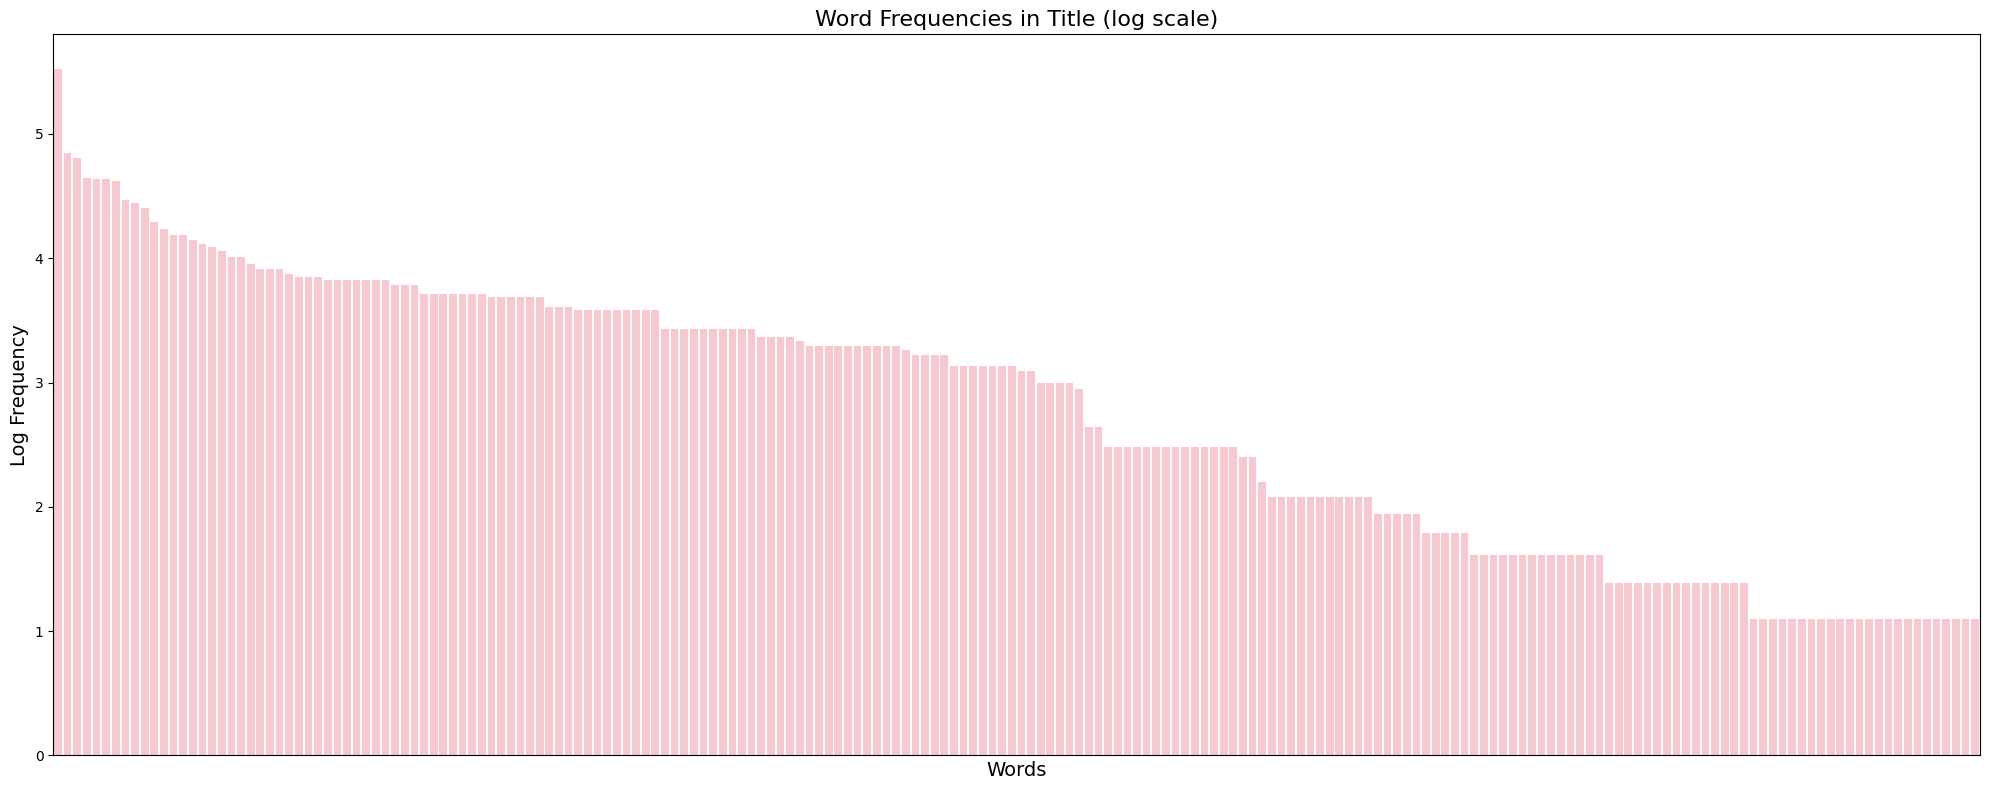

In [203]:
plt.figure(figsize=(20, 8))
g = sns.barplot(x=x_title[:200], y=y_title_log[:200], color="pink")
plt.xticks(rotation=90)
plt.title("Word Frequencies in Title (log scale)", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Log Frequency", fontsize=14)
plt.xticks([]) 

plt.tight_layout()
plt.show()

## Try more

In [204]:
# Create Function to get top frequent words
def get_top_words(df, column, top_n=50, stop_words="english"):
    vect = CountVectorizer(stop_words=stop_words)
    counts = vect.fit_transform(df[column].dropna())
    term_freq = np.asarray(counts.sum(axis=0)).flatten()
    top_index = np.argsort(term_freq)[::-1][:top_n]
    words = vect.get_feature_names_out()[top_index]
    freqs = term_freq[top_index]
    return pd.DataFrame({"word": words, "frequency": freqs})

In [205]:
top50_text = get_top_words(new_df, "text", 50)
top50_title = get_top_words(new_df, "title", 50)

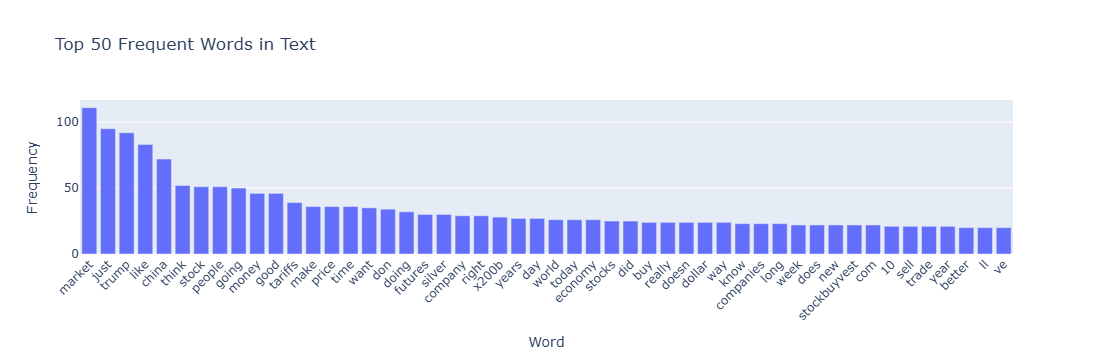

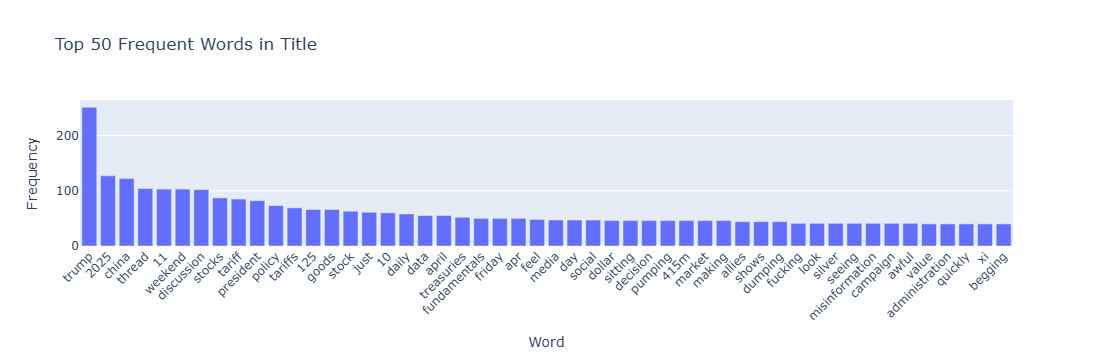

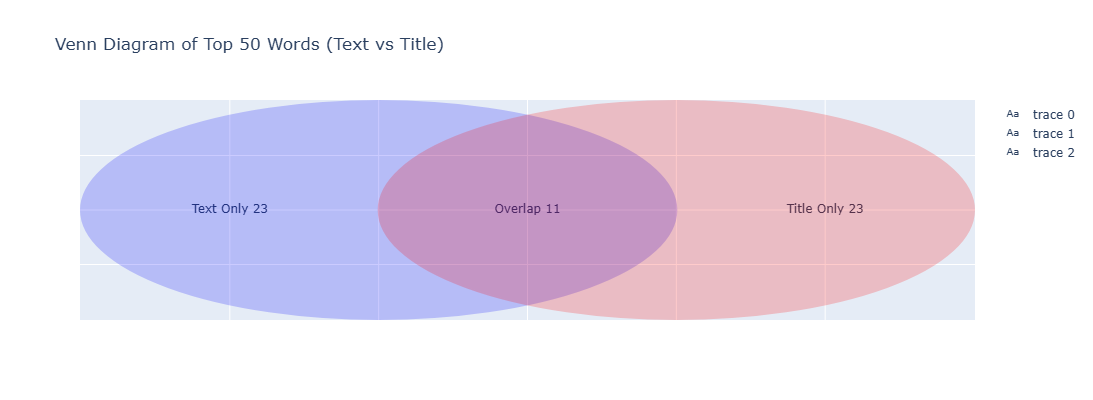

Overlapping words: ['10', 'china', 'day', 'dollar', 'just', 'market', 'silver', 'stock', 'stocks', 'tariffs', 'trump']


In [206]:
import plotly.express as px
import plotly.graph_objects as go

#Distribution of frequent words in Text and Title
fig_text = px.bar(top50_text, x="word", y="frequency", 
                  title="Top 50 Frequent Words in Text",
                  labels={"word": "Word", "frequency": "Frequency"})
fig_text.update_layout(xaxis_tickangle=-45)

fig_title = px.bar(top50_title, x="word", y="frequency", 
                   title="Top 50 Frequent Words in Title",
                   labels={"word": "Word", "frequency": "Frequency"})
fig_title.update_layout(xaxis_tickangle=-45)

fig_text.show()
fig_title.show()

# Venn diagram of top 50 words in Text and Title
# Circle for Text
set_text_50 = set(top50_text["word"])
set_title_50 = set(top50_title["word"])
overlap_50 = set_text_50 & set_title_50
only_text_50 = set_text_50 - set_title_50
only_title_50 = set_title_50 - set_text_50

fig = go.Figure()

# Add circles using layout.shapes
fig.update_layout(
    shapes=[
        dict(type="circle", xref="x", yref="y",
             x0=0, y0=0, x1=2, y1=2,
             line_color="blue", fillcolor="blue", opacity=0.2),
        dict(type="circle", xref="x", yref="y",
             x0=1, y0=0, x1=3, y1=2,
             line_color="red", fillcolor="red", opacity=0.2)
    ]
)

# Labels
fig.add_trace(go.Scatter(x=[0.5], y=[1], text=[f"Text Only\n{len(only_text)}"], mode="text"))
fig.add_trace(go.Scatter(x=[2.5], y=[1], text=[f"Title Only\n{len(only_title)}"], mode="text"))
fig.add_trace(go.Scatter(x=[1.5], y=[1], text=[f"Overlap\n{len(overlap_50)}"], mode="text"))

fig.update_layout(
    title="Venn Diagram of Top 50 Words (Text vs Title)",
    xaxis=dict(showticklabels=False, zeroline=False),
    yaxis=dict(showticklabels=False, zeroline=False),
    width=600, height=400
)

fig.show()

# Print overlapping Words
print("Overlapping words:", sorted(overlap_50))

## Phase 2

In [207]:
### Begin Assignment Here